In [1]:
import pandas as pd

# Curso - Machine Learning: Introdução a classificação com SKLearn

## Aula 3 - Um projeto de baixa dimensionalidade e o baseline

### Carregando o Modelo

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Alterando Nome das Variáveis - Inglês para Português

In [3]:
mapa = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados.rename(columns = mapa, inplace = True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Alterando lógica da coluna finalizado

In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### Visualizando nossos dados

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

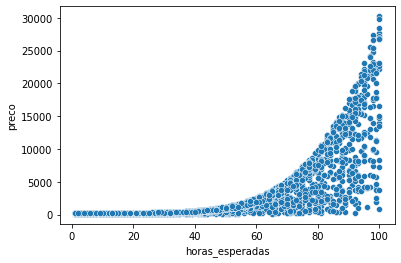

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

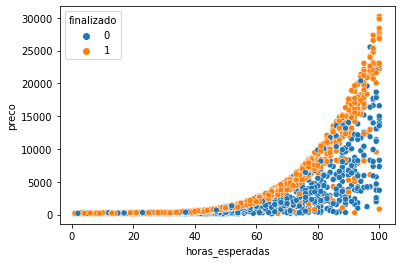

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

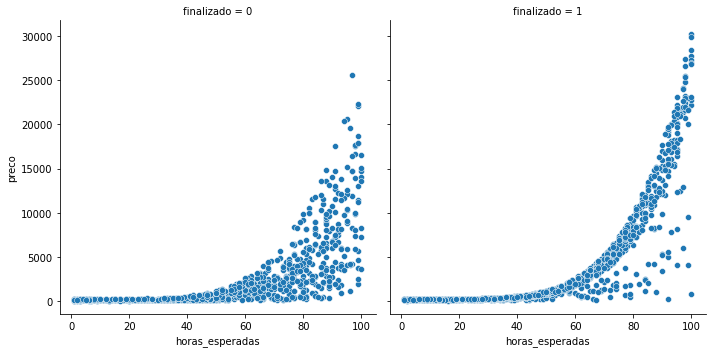

In [8]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

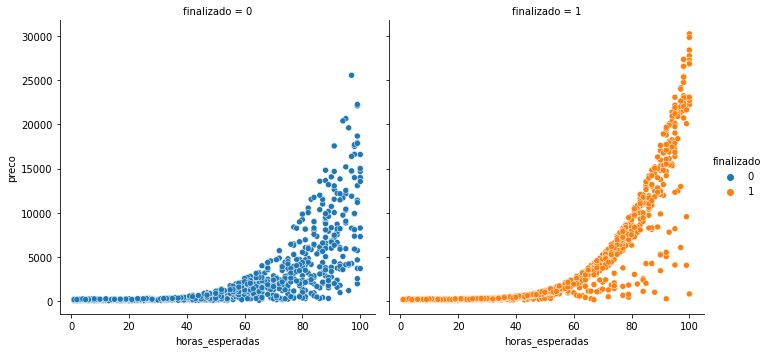

In [9]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=dados)

### Separando em Variáveis Explicativas (X) e Variável Dependente (y)

In [10]:
X = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [11]:
dados.shape

(2157, 4)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [13]:
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(dual = False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.44%


### Usando Baseline

Como saber se 54.44% de acurácia é um valor bom?

Vamos implementar um algoritmo bem simples que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.

In [14]:
import numpy as np
previsoes_do_guilherme = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_guilherme) * 100
print("A acurácia do Guilherme foi %.2f%%" % acuracia)

A acurácia do Guilherme foi 52.59%


O que chamamos de previsoes_do_guilherme, na verdade é a linha de base, ou baseline, e é o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe. Nas próximas aulas iremos analisar detalhadamente o que erramos para termos um acurácia tão baixa

## Curva de Decisão

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

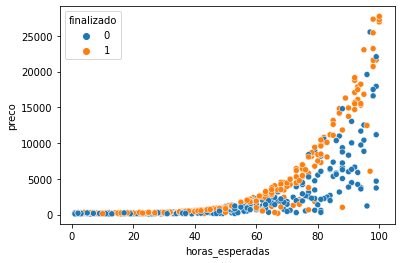

In [15]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 

O algoritmo deve ser capaz de aprender a curva ascendente que vemos no gráfico: quanto mais bem pago e com maior tempo de elaboração, maior chance do projeto ser de fato concluído.

#### Matriz com base nos minimos e maximos de x e y

In [16]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


O x está indo de 1 a 100, enquanto y varia de 101 a 27738. Agora definiremos quantos pixels haverá em cada dimensão; se multiplicamos 100 x 100, isto é, 100 pixels para cada dimensão (altura e largura), teremos um total de 10.000 pontos, o que é o suficiente.

Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.

Por fim, adicionaremos o método arange() da biblioteca do Numpy.

In [19]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

#### Criando o Grid a partir da matriz

biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid

In [20]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

Para mesclar realmente esses dados, usaremos o xx.ravel():

In [22]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

#### Precict para todos os Pontos

In [35]:
Z = modelo.predict(pontos)

In [36]:
Z.shape == xx.shape

False

Mudando o shape de Z com base no shape do X

In [37]:
Z = Z.reshape(xx.shape)

In [38]:
Z.shape == xx.shape

True

In [39]:
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

#### Plotando o gráfico com Matplotlib

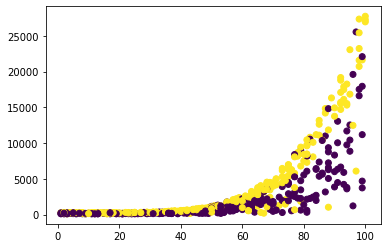

In [40]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

Melhorando a visualização reduzindo o tamanho dos pontos com s=1 (size)

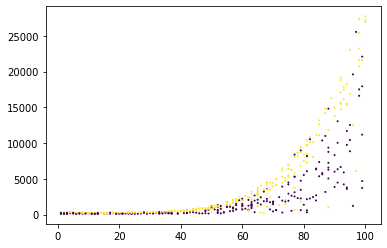

In [41]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

#### Desenhando a classificação dos xx e yy

Se valor = 0 -> pintar de uma cor
Se valor = 1 -> pintar de outra cor

Assim visualizaremos a curva que separa as duas classificações

usaremos plt.contourf() (de countor, ou "contorno"), que receberá xx, yy e Z. Para que a tonalidade não seja muito forte, escreveremos alpha=0.3, aumentando a transparência

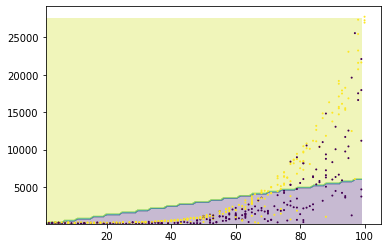

In [42]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é capaz de aprender uma linha reta, que não serve para classificação